In [9]:
!pip install wyrm

     |████████████████████████████████| 61 kB 5.7 MB/s 
  Created wheel for wyrm: filename=Wyrm-1.1.0-py3-none-any.whl size=43962 sha256=2b94f9ac93f86d982266cd4abb18d5f1ec67d742e1280e341848d5aa1a24604b
  Stored in directory: /root/.cache/pip/wheels/de/c9/30/cfd8dd7c4c74e9e3f303a7c13ed2fb434aa3f6755924b64322
Successfully built wyrm


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [4]:
# Load the Preprocessed Data
df = pd.read_csv('/content/preprocessed_MI.csv')


# Print Pandas Dataframe
print(df)
print(df.shape)

                   1             2  ...            7             8
0        -750.803511    486.705886  ...    82.016818    645.467436
1       -4723.440890   3069.026544  ...   520.220124   3985.649834
2      -12831.117329   8373.375049  ...  1432.324527  10540.629666
3      -20211.000688  13285.273611  ...  2301.162509  16057.481102
4      -21638.723649  14350.569332  ...  2514.918974  16782.390676
...              ...           ...  ...          ...           ...
149995    -92.297614     83.232786  ...    -3.902539     39.198155
149996   -442.397605    366.220528  ...    82.744630   -106.964129
149997    -90.160591   -107.153970  ...     8.501344      5.627470
149998    209.551070   -444.767943  ...   -81.477078    201.060314
149999   -299.077543     15.607438  ...   -20.965258    182.809978

[150000 rows x 8 columns]
(150000, 8)


In [5]:
df_eeg_data = df[['1','2','3','4','5','6','7', '8']]

# Split the data into train and test set
train, test = train_test_split(df_eeg_data, test_size=0.2, random_state=42, shuffle=False)

# print(type(train))
# print(test)

In [6]:
# Epoch Data into 10 Second Windows
# 60, 2500, 8

# Convert Test and Training Data into Numpy Array
train = train.to_numpy()
test = test.to_numpy()

# Length of Windows (s)
window_length = 10

# Epoching Training Data
epoched_corrected = []

for filtered in train.T:
    array_epochs = []
    i = 0
    window_size_hz = int(window_length*250) # 10 Seconds

    while(i  < len(train) ):
        array_epochs.append(train[i:i + window_size_hz])
        i = i + window_size_hz 
    
    epoch = array_epochs
    data = np.array(array_epochs) # epoched_train

print(data.shape)


# Epoching Test Data
epoched_corrected = []

for filtered in test.T:
    array_epochs = []
    i = 0
    window_size_hz = int(window_length*250) # 10 Seconds

    while(i  < len(test) ):
        array_epochs.append(test[i:i + window_size_hz])
        i = i + window_size_hz 
    
    epoch = array_epochs
    epoched_test = np.array(array_epochs) # epoched_test

print(epoched_test.shape)



(48, 2500, 8)
(12, 2500, 8)


In [7]:
# Label Test
df_test = pd.read_csv('/content/Label_Test.csv')


# Print Pandas Dataframe
df_test = ((df_test).to_numpy()).flatten()

# Shape of the Testing Labels
print(df_test.shape)

# Label Train
df_train = pd.read_csv('/content/Label_Train.csv')

# Print Pandas Dataframe
df_train = ((df_train).to_numpy()).flatten()

# Shape of the Testing Labels
print(df_train.shape)


(12,)
(48,)


In [10]:
# Convert the train data into wyrm Data Format

from wyrm import processing as proc


from wyrm.types import Data

# Wyrm Data Attributes: 1.axes 2.names 3.units
# Initialize the First Attribute (Axes: describes the number of dimension of data)
axes = [np.arange(i) for i in data.shape]

# Assign 48 Labels to axes[0]
axes[0] = df_train
axes[2] = [str(i) for i in range(data.shape[2])]

# Initialize the 2nd and 3rd attribute(- Name: Describe the name of each dimension of data - Units: The units of the dimensions)
names = ['Class', 'Time', 'Channel']
units = ['#', 'ms', '#']


dat_train = Data(data=data, axes=axes, names=names, units=units)

dat_train.fs = 250

# Classes (2)
dat_train.class_names = ['hands', 'feet']

# Converting 0s and 1s for binary classification
dat_train.axes[0][dat_train.axes[0] == 2] = 0



print(dat_train)

Data: 
[[[-7.50803511e+02  4.86705886e+02  1.63298552e+01 ... -5.27669718e+02
    8.20168184e+01  6.45467436e+02]
  [-4.72344089e+03  3.06902654e+03  1.16509932e+02 ... -3.24983187e+03
    5.20220124e+02  3.98564983e+03]
  [-1.28311173e+04  8.37337505e+03  3.65076691e+02 ... -8.54671000e+03
    1.43232453e+03  1.05406297e+04]
  ...
  [-1.62691646e+01  4.57236154e+00  1.54081920e+01 ...  2.16923179e+00
   -4.30935301e+01 -2.37824395e+01]
  [-1.86089824e+01  5.76180368e+00  1.41951565e+01 ...  9.87593677e+00
   -3.79319325e+01 -2.86993623e+01]
  [-1.04367185e+01  4.61994725e+00  1.10485889e+01 ...  1.09685221e+01
   -3.11317597e+01 -2.86112814e+01]]

 [[ 6.71851069e+00  1.29950656e+00  7.99858393e+00 ... -3.27316296e-01
   -2.61035073e+01 -1.64651270e+01]
  [ 1.51957350e+01  2.18054781e+00  7.80207445e+00 ... -1.36355837e+01
   -2.62951403e+01 -5.24729056e+00]
  [ 8.08347144e+00  6.37124124e+00  9.00802951e+00 ... -1.69961950e+01
   -3.03979057e+01 -4.79126677e+00]
  ...
  [ 8.68493309e+

In [11]:
# Get the data var up and running
data = epoched_test

print(data.shape)

(12, 2500, 8)


In [14]:
# Convert the test data into wyrm data format
axes = [np.arange(i) for i in data.shape]
axes[2] = [str(i) for i in range(data.shape[2])]


# Assign 12 Labels to axes[0]
axes[0] = df_test

names = ['Class', 'Time', 'Channel']
units = ['#', 'ms', '#']

dat_test = Data(data=data, axes = axes, names = names, units = units)

dat_test.fs = 250

# Classes (2)
dat_test.class_names = ['hands' , 'feet']


# Converting 0s and 1s for binary classification
dat_test.axes[0][dat_test.axes[0] == 2] = 0



print(dat_test)

Data: 
[[[-1.30308006e+01  5.94747747e+00 -8.02260130e-01 ... -4.31717878e+01
    1.16714317e+01  3.37564716e+01]
  [-2.01120172e+01  1.18788099e+01 -1.10316714e+00 ... -4.79504315e+01
    2.67306423e+00  2.75692213e+01]
  [-3.06797593e+01  1.51841053e+01 -4.12559331e+00 ... -4.26958314e+01
    2.20938414e+00  1.74196465e+01]
  ...
  [-2.71367652e+00  5.95144827e+00  2.29515604e+01 ...  1.91626244e+01
   -2.71967784e+01 -9.33936316e+00]
  [-2.66171595e+00  6.90510001e+00  2.11903183e+01 ...  1.43312164e+01
   -2.22611217e+01 -6.75522360e+00]
  [-3.21666963e+00  8.10990960e+00  2.16355653e+01 ...  1.18586151e+01
   -1.95658809e+01 -1.27419815e+01]]

 [[-1.32390611e+00  7.46635752e+00  2.33359326e+01 ...  1.01277031e+01
   -2.33748634e+01 -2.04092686e+01]
  [ 2.81801091e+00  7.49465480e+00  2.34506943e+01 ...  2.65566003e+00
   -2.70896474e+01 -1.90944370e+01]
  [ 3.07035453e+00  9.82514330e+00  1.93968069e+01 ... -7.37067195e+00
   -2.14786155e+01 -1.12264030e+01]
  ...
  [-5.75401163e+

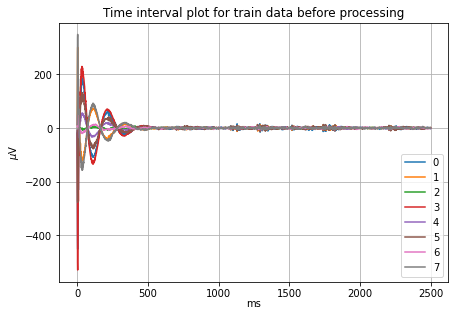

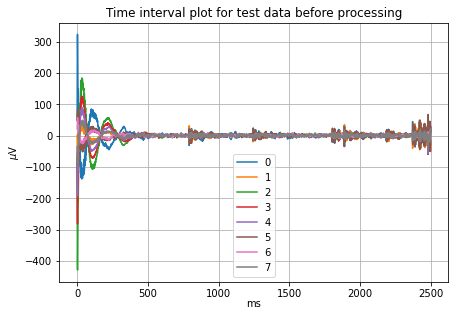

In [15]:
import matplotlib.pyplot as plt
from wyrm import plot as pt
pt.plot_timeinterval(dat_train)
plt.title("Time interval plot for train data before processing")
plt.savefig('/content/Train_before_Process.png', dpi=900, format= "png", bbox_inches="tight")
pt.plot_timeinterval(dat_test)
plt.title("Time interval plot for test data before processing")  
plt.savefig('/content/Test_before_Process.png', dpi=900, format= "png", bbox_inches="tight")

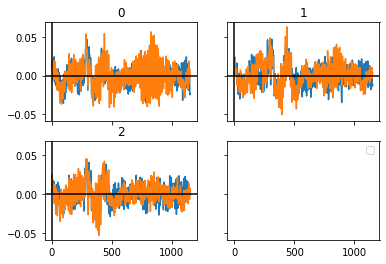

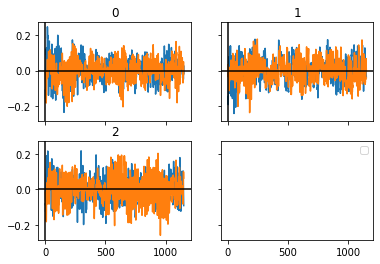

In [ ]:
# Class Average for each channel
pt.plot_channels(dat_train,2)
plt.savefig('/content/train_Class_average.png', dpi=600, format= "png", bbox_inches="tight")
pt.plot_channels(dat_test,2)
plt.savefig('/content/Test_class_average.png', dpi=600, format= "png", bbox_inches="tight")

In [ ]:
import matplotlib.pyplot as plt
from wyrm import plot as pt

def prepoc(dat_train, dat_test):
  fsm=dat_train.fs/2
  # filtering the data with 0.9 Hz high and 15 Hz low filter to reduce noise
  #Applying butterworth filters accompanied low pass and high pass filter
  c,a=proc.signal.butter(8,[15/fsm],btype='low')
  dat_train=proc.lfilter(dat_train,c,a)
  c,a=proc.signal.butter(8,0.9/fsm,btype='high')
  dat_train=proc.lfilter(dat_train,c,a)
  c,a=proc.signal.butter(8,[15/fsm],btype='low')
  dat_test=proc.lfilter(dat_test,c,a)
  c,a=proc.signal.butter(8,0.9/fsm,btype='high')
  dat_test=proc.lfilter(dat_test,c,a)
  
  
  # dat_train = proc.subsample(dat_train, 15.625,1)
  # dat_test = proc.subsample(dat_test, 15.625,1)

  pt.plot_timeinterval(dat_train)
  plt.title("Time interval plot for train data after filtering and subsampling")
  plt.savefig('/content/Train_After_Process.png', dpi=900, format= "png", bbox_inches="tight")

  pt.plot_timeinterval(dat_test)
  plt.title("Time interval plot for test data after filtering and subsampling")
  plt.savefig('/content/Test_After_Process.png', dpi=900, format= "png", bbox_inches="tight")
  
  #applying common spatial pattern
  filt, pattern, _ = proc.calculate_csp(dat_train)
  dat_train = proc.apply_csp(dat_train, filt)
  dat_test = proc.apply_csp(dat_test, filt)
  dat_train = proc.variance(dat_train,1)
  dat_train = proc.logarithm(dat_train)
  
  dat_test = proc.variance(dat_test,1)
  dat_test = proc.logarithm(dat_test)
  dat_train = proc.rectify_channels(dat_train)
  dat_test = proc.rectify_channels(dat_test)
  
  dat_train = proc.square(dat_train)
  dat_test = proc.square(dat_test)
  
  pt.plot_timeinterval(dat_train)
  plt.title("Time interval plot for train data after CSP filter")
  pt.plot_timeinterval(dat_test)
  plt.title("Time interval plot for test data after CSP filter")

  return dat_train,dat_test


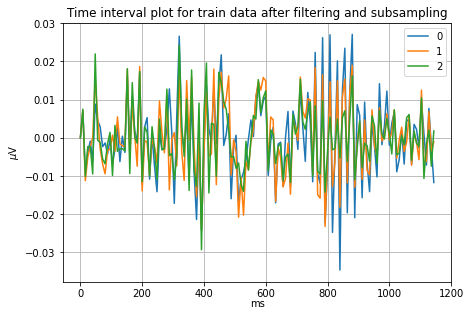

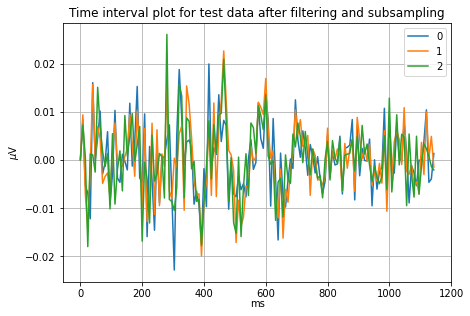

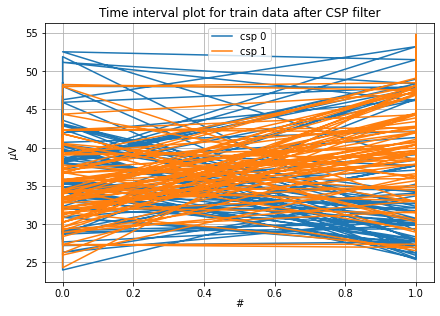

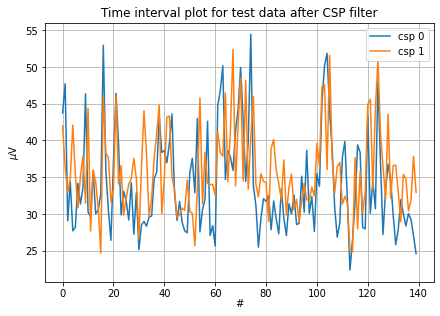

In [ ]:
fvtr, fvte = prepoc(dat_train, dat_test)

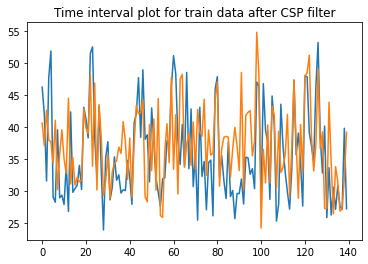

In [ ]:
plt.plot(fvtr.data) #CSP for label 0 and 1 in train data
#plt.show
plt.title("Time interval plot for train data after CSP filter")
plt.savefig('/contentTrain_After_CSP.png', dpi=600, format= "png", bbox_inches="tight")

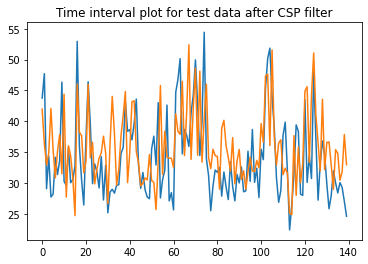

In [ ]:
plt.plot(fvte.data) #CSP for label 0 and 1 in test data
plt.title("Time interval plot for test data after CSP filter")
plt.savefig('/content/Test_After_CSP.png', dpi=600, format= "png", bbox_inches="tight")

# **## HERES WHERE WE RLLY START TO SCUFF STUFF UP :))**

## **LDA Classification**

In [ ]:
from wyrm import processing as proc

cfy = proc.lda_train(fvtr)
result=proc.lda_apply(fvte,cfy)
result1=(np.sign(result)+1)/2

In [ ]:
sum=0.0
for i in range(len(result1)):
	if result1[i]==df_test[i]:
		sum=sum+1
lda_acc=sum/(len(result))
print  (lda_acc)

0.7928571428571428


In [ ]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TP / float(TP + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [ ]:
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(df_test, result1)

In [ ]:
confusion_metrics(cm)

True Positives: 54
True Negatives: 57
False Positives: 13
False Negatives: 16
--------------------------------------------------
Accuracy: 0.79
Mis-Classification: 0.21
Sensitivity: 0.77
Specificity: 0.81
Precision: 0.81
f_1 Score: 0.79


In [ ]:
from sklearn.metrics import matthews_corrcoef
lda_mcc= matthews_corrcoef(df_test,result1)
lda_mcc

0.5862529287108078

## **Train Labels**

In [ ]:
y_tr=df_train
y_tr[y_tr == 2] = 0

## **Random Forest Classifier**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param={
'max_depth':[5,10,20,50,100],

'n_estimators':[2,10,25,50,100]
}

first_xgb = RandomForestClassifier()
clf =GridSearchCV(first_xgb,param, cv=5,verbose=2)
clf.fit(fvtr.data,y_tr)
print(clf.best_params_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] max_depth=5, n_estimators=2 .....................................
[CV] ...................... max_depth=5, n_estimators=2, total=   0.0s
[CV] max_depth=5, n_estimators=2 .....................................
[CV] ...................... max_depth=5, n_estimators=2, total=   0.0s
[CV] max_depth=5, n_estimators=2 .....................................
[CV] ...................... max_depth=5, n_estimators=2, total=   0.0s
[CV] max_depth=5, n_estimators=2 .....................................
[CV] ...................... max_depth=5, n_estimators=2, total=   0.0s
[CV] max_depth=5, n_estimators=2 .....................................
[CV] ...................... max_depth=5, n_estimators=2, total=   0.0s
[CV] max_depth=5, n_estimators=10 ....................................
[CV] ..................... max_depth=5, n_estimators=10, total=   0.0s
[CV] max_depth=5, n_estimators=10 ....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... max_depth=5, n_estimators=25, total=   0.1s
[CV] max_depth=5, n_estimators=25 ....................................
[CV] ..................... max_depth=5, n_estimators=25, total=   0.0s
[CV] max_depth=5, n_estimators=25 ....................................
[CV] ..................... max_depth=5, n_estimators=25, total=   0.0s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..................... max_depth=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..................... max_depth=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..................... max_depth=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..................... max_depth=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    7.2s finished


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score, precision_score, recall_score
rf = RandomForestClassifier(max_depth = 5, n_estimators=50,n_jobs=1)
rf.fit(fvtr.data, y_tr)
rf_predict= rf.predict(fvte.data)
#rf_probs=rf.predict_proba(xte12)[:,1]
rf_acc=accuracy_score(df_test,rf_predict)
rf_mcc= matthews_corrcoef(df_test,rf_predict)
rf_mcc

0.4865092359773211

In [ ]:
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, rf_predict)


In [ ]:
confusion_metrics(cm)

True Positives: 50
True Negatives: 54
False Positives: 16
False Negatives: 20
--------------------------------------------------
Accuracy: 0.74
Mis-Classification: 0.26
Sensitivity: 0.71
Specificity: 0.77
Precision: 0.76
f_1 Score: 0.74


## **XGBoost Classifier**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

param={
'min_child_weight':[5,10,15],
'max_depth':[5,10,20,50,100],
'learning_rate':[0.001,0.05,0.5,1],
'subsample':[0.8,0.5,0.2],
'n_estimators':[2,10,25,50,100]
}

first_xgb = xgb.XGBClassifier()
clf =GridSearchCV(first_xgb,param, cv=5,verbose=2)
clf.fit(fvtr.data,y_tr)
print(clf.best_params_)


Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV] learning_rate=0.001, max_depth=5, min_child_weight=5, n_estimators=2, subsample=0.8 
[CV]  learning_rate=0.001, max_depth=5, min_child_weight=5, n_estimators=2, subsample=0.8, total=   0.2s
[CV] learning_rate=0.001, max_depth=5, min_child_weight=5, n_estimators=2, subsample=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV]  learning_rate=0.05, max_depth=50, min_child_weight=15, n_estimators=50, subsample=0.5, total=   0.0s
[CV] learning_rate=0.05, max_depth=50, min_child_weight=15, n_estimators=50, subsample=0.5 
[CV]  learning_rate=0.05, max_depth=50, min_child_weight=15, n_estimators=50, subsample=0.5, total=   0.0s
[CV] learning_rate=0.05, max_depth=50, min_child_weight=15, n_estimators=50, subsample=0.5 
[CV]  learning_rate=0.05, max_depth=50, min_child_weight=15, n_estimators=50, subsample=0.5, total=   0.0s
[CV] learning_rate=0.05, max_depth=50, min_child_weight=15, n_estimators=50, subsample=0.5 
[CV]  learning_rate=0.05, max_depth=50, min_child_weight=15, n_estimators=50, subsample=0.5, total=   0.0s
[CV] learning_rate=0.05, max_depth=50, min_child_weight=15, n_estimators=50, subsample=0.5 
[CV]  learning_rate=0.05, max_depth=50, min_child_weight=15, n_estimators=50, subsample=0.5, total=   0.0s
[CV] learning_rate=0.05, max_depth=50, min_chi

[Parallel(n_jobs=1)]: Done 4500 out of 4500 | elapsed:   44.5s finished


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score, precision_score, recall_score
xg = xgb.XGBClassifier(max_depth = 5, n_estimators=25,n_jobs=1,learning_rate=0.05,min_child_weight=5,subsample=0.8)
xg.fit(fvtr.data, y_tr)
xg_predict= xg.predict(fvte.data)
xg_acc=accuracy_score(df_test,xg_predict)
xg_mcc= matthews_corrcoef(df_test,xg_predict)
xg_mcc

0.4402254531628119

In [ ]:
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(df_test, xg_predict)


In [ ]:
cmdf = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
cmdf

,Predicted Negative,Predicted Positive
Actual Negative,42,28
Actual Positive,12,58


In [ ]:
confusion_metrics(cm)

True Positives: 58
True Negatives: 42
False Positives: 28
False Negatives: 12
--------------------------------------------------
Accuracy: 0.71
Mis-Classification: 0.29
Sensitivity: 0.83
Specificity: 0.6
Precision: 0.67
f_1 Score: 0.74


## **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

param={
'C':[0.0001,0.001,0.01,0.1,1,10,100,1000]
}

svm = SVC()
clf =GridSearchCV(svm,param, cv=5,verbose=2)
clf.fit(fvtr.data,y_tr)
print(clf.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


In [ ]:
svm = SVC(C=0.0001, probability=True)
svm.fit(fvtr.data, y_tr)
svm_predict= svm.predict(fvte.data)
svm_acc=accuracy_score(df_test,svm_predict)
svm_mcc= matthews_corrcoef(df_test,svm_predict)
svm_mcc

0.4753740567999037

In [ ]:
confusion_metrics(cm)

True Positives: 56
True Negatives: 47
False Positives: 23
False Negatives: 14
--------------------------------------------------
Accuracy: 0.74
Mis-Classification: 0.26
Sensitivity: 0.8
Specificity: 0.67
Precision: 0.71
f_1 Score: 0.75


## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

param={
'C':[0.0001,0.001,0.01,0.1,1,10,100,1000]
}

lr = LogisticRegression()
clf =GridSearchCV(lr,param, cv=5,verbose=2)
clf.fit(fvtr.data,y_tr)
print(clf.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................................. C=10, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=1000 ..........................................................
[CV] ........................................... C=1000, total=   0.0s
[CV] C=1000 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.3s finished


In [ ]:
lr = LogisticRegression(C=0.00001)
lr.fit(fvtr.data, y_tr)
lr_predict= lr.predict(fvte.data)
lr_acc=accuracy_score(df_test,lr_predict)
lr_mcc= matthews_corrcoef(df_test,lr_predict)
lr_mcc

0.5576552248712563

In [ ]:
confusion_metrics(cm)

True Positives: 53
True Negatives: 56
False Positives: 14
False Negatives: 17
--------------------------------------------------
Accuracy: 0.78
Mis-Classification: 0.22
Sensitivity: 0.76
Specificity: 0.8
Precision: 0.79
f_1 Score: 0.77


## **K Nearest Neighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
param={
'n_neighbors':[2,6,10]
}

kn = KNeighborsClassifier()
clf =GridSearchCV(kn,param, cv=5,verbose=2)
clf.fit(fvtr.data,y_tr)
print(clf.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] .................................... n_neighbors=6, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


In [ ]:
kn = KNeighborsClassifier(n_neighbors=10)
kn.fit(fvtr.data, y_tr)
kn_predict= kn.predict(fvte.data)
k_acc=accuracy_score(df_test,kn_predict)
kn_mcc= matthews_corrcoef(df_test,kn_predict)
kn_mcc

0.5041846056968675

In [ ]:
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(df_test, kn_predict)

confusion_metrics(cm)

True Positives: 48
True Negatives: 57
False Positives: 13
False Negatives: 22
--------------------------------------------------
Accuracy: 0.75
Mis-Classification: 0.25
Sensitivity: 0.69
Specificity: 0.81
Precision: 0.79
f_1 Score: 0.73


## **Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(fvtr.data, y_tr)
nb_predict= nb.predict(fvte.data)
nb_acc=accuracy_score(df_test,nb_predict)
nb_mcc= matthews_corrcoef(df_test,nb_predict)
nb_mcc

0.4270713489651562

In [ ]:
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(df_test, nb_predict)

confusion_metrics(cm)

True Positives: 41
True Negatives: 58
False Positives: 12
False Negatives: 29
--------------------------------------------------
Accuracy: 0.71
Mis-Classification: 0.29
Sensitivity: 0.59
Specificity: 0.83
Precision: 0.77
f_1 Score: 0.67


## **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
param={
'max_depth':[2,6,10,40,70,100],
'min_samples_split':[5,10,100,500]
}

dt = DecisionTreeClassifier()
clf =GridSearchCV(dt,param, cv=5,verbose=2)
clf.fit(fvtr.data,y_tr)
print(clf.best_params_)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] max_depth=2, min_samples_split=5 ................................
[CV] ................. max_depth=2, min_samples_split=5, total=   0.0s
[CV] max_depth=2, min_samples_split=5 ................................
[CV] ................. max_depth=2, min_samples_split=5, total=   0.0s
[CV] max_depth=2, min_samples_split=5 ................................
[CV] ................. max_depth=2, min_samples_split=5, total=   0.0s
[CV] max_depth=2, min_samples_split=5 ................................
[CV] ................. max_depth=2, min_samples_split=5, total=   0.0s
[CV] max_depth=2, min_samples_split=5 ................................
[CV] ................. max_depth=2, min_samples_split=5, total=   0.0s
[CV] max_depth=2, min_samples_split=10 ...............................
[CV] ................ max_depth=2, min_samples_split=10, total=   0.0s
[CV] max_depth=2, min_samples_split=10 ...............................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............. max_depth=40, min_samples_split=500, total=   0.0s
[CV] max_depth=70, min_samples_split=5 ...............................
[CV] ................ max_depth=70, min_samples_split=5, total=   0.0s
[CV] max_depth=70, min_samples_split=5 ...............................
[CV] ................ max_depth=70, min_samples_split=5, total=   0.0s
[CV] max_depth=70, min_samples_split=5 ...............................
[CV] ................ max_depth=70, min_samples_split=5, total=   0.0s
[CV] max_depth=70, min_samples_split=5 ...............................
[CV] ................ max_depth=70, min_samples_split=5, total=   0.0s
[CV] max_depth=70, min_samples_split=5 ...............................
[CV] ................ max_depth=70, min_samples_split=5, total=   0.0s
[CV] max_depth=70, min_samples_split=10 ..............................
[CV] ............... max_depth=70, min_samples_split=10, total=   0.0s
[CV] max_depth=70, min_samples_split=10 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.3s finished


In [ ]:
from sklearn.naive_bayes import GaussianNB
dt = DecisionTreeClassifier(max_depth=2,min_samples_split=5)
dt.fit(fvtr.data, y_tr)
dt_predict= dt.predict(fvte.data)
dt_acc=accuracy_score(df_test,dt_predict)
dt_mcc= matthews_corrcoef(df_test,dt_predict)
dt_mcc

0.4241380059937358

In [ ]:
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(df_test, dt_predict)

confusion_metrics(cm)

True Positives: 57
True Negatives: 42
False Positives: 28
False Negatives: 13
--------------------------------------------------
Accuracy: 0.71
Mis-Classification: 0.29
Sensitivity: 0.81
Specificity: 0.6
Precision: 0.67
f_1 Score: 0.74


## Model Comparison

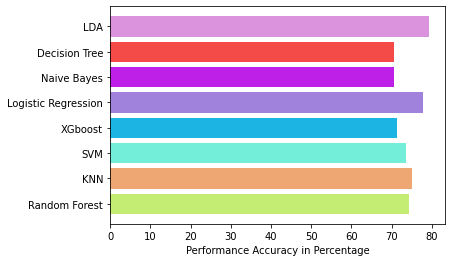

In [ ]:
X_bar = ['Random Forest','KNN','SVM','XGboost','Logistic Regression','Naive Bayes','Decision Tree','LDA']
Y_bar= [rf_acc*100,k_acc*100,svm_acc*100,xg_acc*100,lr_acc*100,nb_acc*100,dt_acc*100,lda_acc*100]
import matplotlib.pyplot as plt
plt.barh(X_bar, Y_bar, align='center', color=('#C4EE73','#EEA773', '#73EED9', '#1CB4E3', '#A081DC', '#BE20E7', '#F54B48','#DC93DD'))
plt.xlabel("Performance Accuracy in Percentage")
#plt.show()
plt.savefig('/content/Comparison.png', dpi=600, format= "png", bbox_inches="tight")
                      